In [1]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 12
#import warnings
import json 

In [2]:
with open('../yelp_json/yelp_academic_dataset_review.json') as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

reviews=pd.DataFrame(data)

In [3]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996996 entries, 0 to 5996995
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 411.8+ MB


In [5]:
useful_reviews = len(reviews[reviews["useful"]>0])
cool_reviews = len(reviews[reviews["cool"]>0])
funny_reviews = len(reviews[reviews["funny"]>0])
negative_reviws = len(reviews[reviews["stars"]<=2])
positive_reviews =len(reviews[reviews["stars"]>=3])
total_reviews = len(reviews)

print("Total reviews: {}".format(total_reviews))
print("Useful reviews: {}".format(useful_reviews))
print("Funny reviews: {}".format(funny_reviews))
print("Cool reviews: {}".format(cool_reviews))
print("Total negative reviews: {}".format(negative_reviws))
print("Total positive reviews: {}".format(positive_reviews))

Total reviews: 5996996
Useful reviews: 2825211
Funny reviews: 1247440
Cool reviews: 1517814
Total negative reviews: 1345953
Total positive reviews: 4651043


In [6]:
## to have better results i only took 
## the reviews equal to 1 for negative 
## and the reviews equal to 5 for positive

In [7]:
negative_reviews=reviews[reviews['stars']==1]

In [8]:
positive_reviews=reviews[reviews['stars']==5]

In [9]:
negative_reviews=negative_reviews.reset_index(drop=True)
positive_reviews=positive_reviews.reset_index(drop=True)

In [10]:
negative_reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
1,vgfcTvK81oD4r50NMjU2Ag,0,2011-02-25,0,pfavA0hr3nyqO61oupj-lA,1,This place sucks. The customer service is horr...,2,msQe1u7Z_XuqjGoqhB0J5g
2,UBv8heCQR0RPnUQG0zkXIQ,0,2016-09-23,0,HkYqGb0Gplmmk-xlHTRBoA,1,The score should be negative. Its HORRIBLE. Th...,0,NhOc64RsrTT1Dls50yYW8g
3,3Mx4renubPRnjHUw1n2UkA,0,2015-09-30,1,MTrzrLQT_LK2VLK9xantHw,1,If I could leave zero stars I would. This rude...,4,eAavwM32i2h7sNNer--kGw
4,f-v1fvtnbdw_QQRsCnwH-g,0,2017-11-18,0,alI_kRKyEHfdHibYGgtJbw,1,I have to write a review on the Fractured Prun...,0,Fc_nb6N6Sdurqb-rwsY1Bw


In [11]:
positive_reviews=positive_reviews[['text']]

In [12]:
positive_reviews['class']='positive'
negative_reviews=negative_reviews[['text']]
negative_reviews['class']='negative'

In [13]:
negative_reviews.shape

(858139, 2)

In [14]:
positive_reviews.shape

(2641880, 2)

In [15]:
sentiment=pd.concat([negative_reviews,positive_reviews])

In [16]:
sentiment.shape

(3500019, 2)

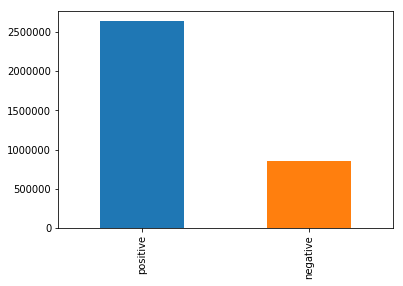

In [17]:
sentiment['class'].value_counts().plot.bar()

# Data Cleaning

In [18]:
## this block is because of my limited resources // cant work on the hole data 
positive_reviews=sentiment[sentiment['class']=='positive'][:50000]
negative_reviews=sentiment[sentiment['class']=='negative'][:50000]
del(sentiment)
sentiment=pd.concat([positive_reviews,negative_reviews])

In [19]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
from string import digits, punctuation

In [20]:
stop = stopwords.words('english')

In [21]:
# remove stopwords
sentiment['clean_text'] = sentiment['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# remove digits
sentiment.clean_text = sentiment.clean_text.apply(lambda x: x.translate(str.maketrans('','',digits)))
# convert all text to lowercase (better to find similar vectors later)
sentiment.clean_text = sentiment.clean_text.apply(lambda x: x.lower())
# remove punctuation
sentiment.clean_text = sentiment.clean_text.apply(lambda x: x.translate(str.maketrans('','',punctuation)))

In [22]:
sentiment.shape

(100000, 3)

## Text processors [# taken from nltk]

In [23]:
import re
class ExtraSpacesReplacer(object):
    """ Replaces extra spaces in a text.
    >>> replacer = ExtraSpacesReplacer()
    >>> replacer.replace("and it was excellent.  The weather was perfect")
    'and it was excellent. The weather was perfect'
    """
    
    def replace(self, text):
        s = text
        s = re.sub('\s\s+', ' ', s)
        return s

In [24]:
# Codes taken from Python 3 Text Processing with NLTK 3 Cookbook - Jacob Perkins

##################################################
## Replacing Words Matching Regular Expressions ##
##################################################

replacement_patterns = [
    (r'won\'t', 'will not'),
    (r'can\'t', 'cannot'),
    (r'i\'m', 'i am'),
    (r'I\'m', 'I am'),
    (r'ain\'t', 'is not'),
    (r'(\w+)\'ll', '\g<1> will'),
    (r'(\w+)n\'t', '\g<1> not'),
    (r'(\w+)\'ve', '\g<1> have'),
    (r'(\w+)\'s', '\g<1> is'),
    (r'(\w+)\'re', '\g<1> are'),
    (r'(\w+)\'d', '\g<1> would'),
]

In [25]:
class ContractionReplacer(object):
    """ Replaces regular expression in a text.
    >>> replacer = RegexpReplacer()
    >>> replacer.replace("can't is a contraction")
    'cannot is a contraction'
    >>> replacer.replace("I should've done that thing I didn't do")
    'I should have done that thing I did not do'
    """
    def __init__(self, patterns=replacement_patterns):
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]
    
    def replace(self, text):
        s = text

        for (pattern, repl) in self.patterns:
            s = re.sub(pattern, repl, s)

        return s

In [26]:
from nltk.corpus import wordnet

class RepeatReplacer(object):
    """ Removes repeating characters until a valid word from disctionary is found.
    >>> replacer = RepeatReplacer()
    >>> replacer.replace('looooove')
    'love'
    >>> replacer.replace('oooooh')
    'ooh'
    >>> replacer.replace('goose')
    'goose'
    """
    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'

    def replace(self, word):
        if wordnet.synsets(word):
            return word
        
        repl_word = self.repeat_regexp.sub(self.repl, word)

        if repl_word != word:
            return self.replace(repl_word)
        else:
            return repl_word

In [27]:
class CarriageReturnReplacer(object):
    """ Replaces \r\n expressions in a text.
    >>> replacer = CarriageReturnReplacer()
    >>> replacer.replace("\r\n\r\nAnyway, I can\'t wait to go back!")
    'Anyway, I can\'t wait to go back!'
    """
    
    def replace(self, text):
        s = text
        s = s.replace('\r\n', ' ')
        s = s.replace('\n\n', ' ') 
        s = s.replace('\n', ' ')
        s = s.replace('\r', ' ') 
        return s

In [28]:
#import enchant
from nltk.metrics import edit_distance

class SpellingReplacer(object):
    def __init__(self, dict_name='en', max_dist=1):
        self.spell_dict = enchant.Dict(dict_name)
        self.max_dist = max_dist
    
    def replace(self, word):
        if self.spell_dict.check(word):
            return word
    
        suggestions = self.spell_dict.suggest(word)
    
        if suggestions and edit_distance(word, suggestions[0]) <= self.max_dist:
            return suggestions[0]
        else:
            return word

## Applying text processors

In [29]:
repeat_replacer = RepeatReplacer()
contraction_replacer = ContractionReplacer()
newline_replacer = CarriageReturnReplacer()
spaces_replacer = ExtraSpacesReplacer()

In [30]:
# replace new line characters
sentiment['clean_text'] = sentiment['clean_text'].apply(newline_replacer.replace)
# replace extra spaces
sentiment['clean_text'] = sentiment['clean_text'].apply(spaces_replacer.replace)
# replace contractions
sentiment['clean_text'] = sentiment['clean_text'].apply(contraction_replacer.replace)

## word cloud 

In [31]:
from wordcloud import WordCloud

### word cloud negative reviews

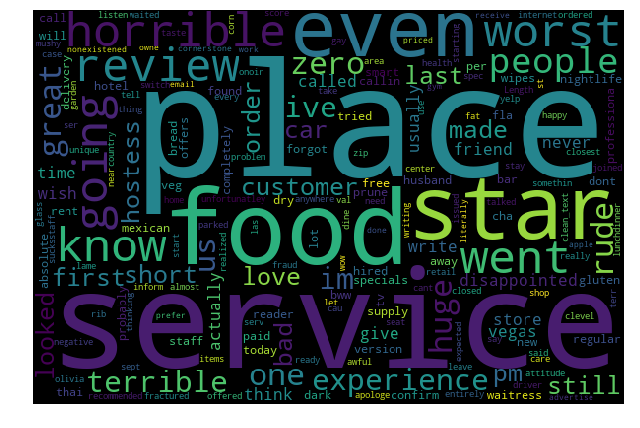

In [32]:
# Generate a word cloud image for negative reviews
text=sentiment['clean_text'][sentiment['class']=='negative']
polarity_pos_wordcloud = WordCloud(width=600, height=400).generate(str(text))
plt.figure( figsize=(9,9))
plt.imshow(polarity_pos_wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

### word cloud positive reviews

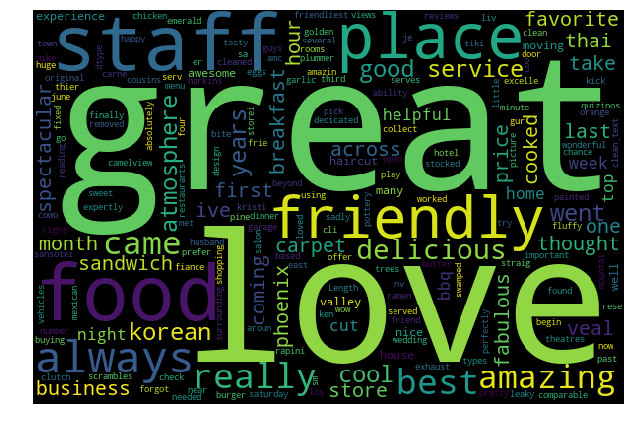

In [33]:
# Generate a word cloud image for positive reviews
text=sentiment['clean_text'][sentiment['class']=='positive']
polarity_pos_wordcloud = WordCloud(width=600, height=400).generate(str(text))
plt.figure( figsize=(9,9))
plt.imshow(polarity_pos_wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

# Simple Sentiment analysis Model

In [34]:
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [35]:
X = sentiment.clean_text
y = sentiment['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [36]:
# encode categorical data
from sklearn import preprocessing

In [37]:
le = preprocessing.LabelEncoder() 
le.fit(y_test) 
le.transform(y_test) 

array([0, 0, 1, ..., 1, 0, 1])

In [38]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer(lowercase=False)
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)

In [39]:
class_names=["negative", "positive"] 

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix,accuracy_score

LogReg_pipeline = Pipeline([
               ('vect', CountVectorizer(ngram_range=(1,2) ) ),
               ('tfidf', TfidfTransformer() ),
               ('clf', LogisticRegression()),
                ])


LogReg_pipeline.fit(X_train,y_train)

%time
# predict test instances
y_pred_reg = LogReg_pipeline.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred_reg, y_test))
#print(classification_report(y_test, y_predsVC,target_names=class_names))


/home/emna/.virtualenvs/yelpChallenge/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
accuracy 0.9653


In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_reg,target_names=class_names))
 

              precision    recall  f1-score   support

    negative       0.96      0.97      0.97     14945
    positive       0.97      0.96      0.97     15055

   micro avg       0.97      0.97      0.97     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.97      0.97      0.97     30000



In [42]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

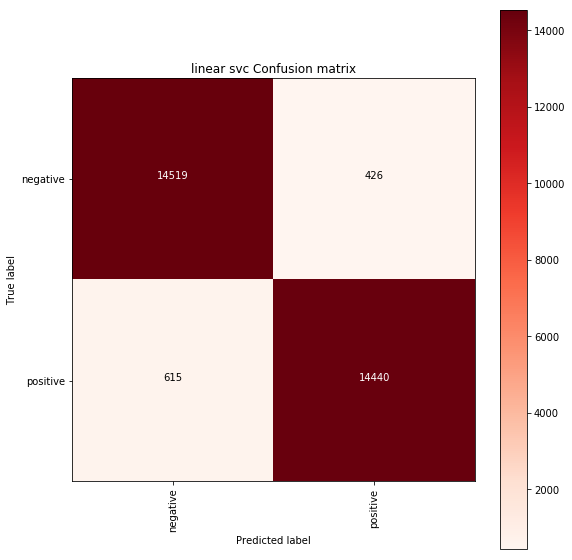

In [43]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_reg), classes=class_names,
                      title='linear svc Confusion matrix')

plt.show()

## Grid search for best parameters ( stoped it for memory issues)

In [44]:
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['liblinear']}] 

In [ ]:
# Create a grid search object for best model estmators
# my laptop wont run this 
from sklearn.model_selection import GridSearchCV
gs_lr = GridSearchCV(estimator=LogReg_pipeline,
            param_grid=grid_params_lr,
            scoring='accuracy',
            cv=10) 
gs_lr.fit(X, y)

# Deep Learning

In [45]:
X=sentiment.clean_text
y=sentiment['class']
train_posts, test_posts, train_tags, test_tags = train_test_split(X, y, test_size=0.2, random_state = 42)

In [46]:
from keras.preprocessing.text import  Tokenizer
num_labels = len(class_names)
vocab_size = 10000
batch_size = 100
 
# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_posts)

Using TensorFlow backend.


In [47]:
x_train = tokenizer.texts_to_matrix(train_posts, mode='tfidf')

In [48]:
x_test = tokenizer.texts_to_matrix(test_posts, mode='tfidf')

In [49]:
from sklearn.preprocessing import LabelBinarizer 

encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [50]:
num_labels

2

In [51]:
from keras.utils import to_categorical

# convert the labels from integers to vectors
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [52]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import  Convolution2D,Conv2D, MaxPooling2D, AveragePooling2D,ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization

model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
 
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint("model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint]

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=100,
                    verbose=1,
                    validation_split=0.1,callbacks=callbacks_list)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               5120512   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
__________

72000/72000 [==============================] - 5s 65us/step - loss: 0.0051 - acc: 0.9992 - val_loss: 0.1637 - val_acc: 0.9636

Epoch 00035: val_acc did not improve from 0.96675
Epoch 36/100
72000/72000 [==============================] - 5s 65us/step - loss: 0.0048 - acc: 0.9993 - val_loss: 0.1655 - val_acc: 0.9646

Epoch 00036: val_acc did not improve from 0.96675
Epoch 37/100
72000/72000 [==============================] - 5s 64us/step - loss: 0.0047 - acc: 0.9993 - val_loss: 0.1662 - val_acc: 0.9640

Epoch 00037: val_acc did not improve from 0.96675
Epoch 38/100
72000/72000 [==============================] - 5s 64us/step - loss: 0.0045 - acc: 0.9994 - val_loss: 0.1669 - val_acc: 0.9650

Epoch 00038: val_acc did not improve from 0.96675
Epoch 39/100
72000/72000 [==============================] - 5s 64us/step - loss: 0.0044 - acc: 0.9993 - val_loss: 0.1664 - val_acc: 0.9646

Epoch 00039: val_acc did not improve from 0.96675
Epoch 40/100
72000/72000 [==============================] - 5s 

72000/72000 [==============================] - 5s 64us/step - loss: 0.0022 - acc: 0.9998 - val_loss: 0.1953 - val_acc: 0.9648

Epoch 00078: val_acc did not improve from 0.96675
Epoch 79/100
72000/72000 [==============================] - 5s 64us/step - loss: 0.0020 - acc: 0.9998 - val_loss: 0.1989 - val_acc: 0.9643

Epoch 00079: val_acc did not improve from 0.96675
Epoch 80/100
72000/72000 [==============================] - 5s 64us/step - loss: 0.0020 - acc: 0.9998 - val_loss: 0.1974 - val_acc: 0.9640

Epoch 00080: val_acc did not improve from 0.96675
Epoch 81/100
72000/72000 [==============================] - 5s 64us/step - loss: 0.0020 - acc: 0.9998 - val_loss: 0.1971 - val_acc: 0.9644

Epoch 00081: val_acc did not improve from 0.96675
Epoch 82/100
72000/72000 [==============================] - 5s 65us/step - loss: 0.0020 - acc: 0.9998 - val_loss: 0.1982 - val_acc: 0.9636

Epoch 00082: val_acc did not improve from 0.96675
Epoch 83/100
72000/72000 [==============================] - 5s 

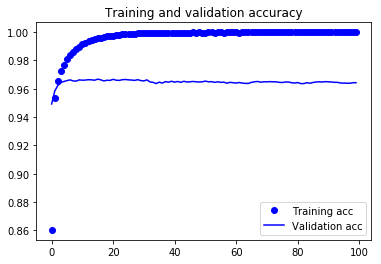

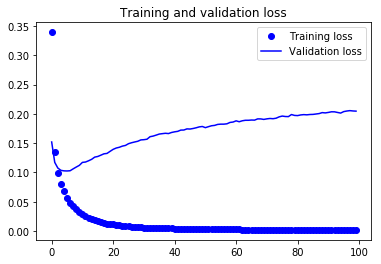

In [53]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [54]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
 
print('Test accuracy:', score[1])

20000/20000 [==============================] - 1s 49us/step
Test accuracy: 0.9659000062942504


In [55]:
# Predict a review

In [56]:
text="The pizza was okay. Not the best"

In [57]:
to_predict=tokenizer.texts_to_matrix([text], mode='tfidf')

In [58]:
predicted = model.predict(to_predict)[0]

In [59]:
predicted

array([0.9134861 , 0.08651385], dtype=float32)

In [60]:
results=list(zip(predicted, class_names))

In [61]:
results

[(0.9134861, 'negative'), (0.086513855, 'positive')]

In [62]:
## prediction with cleaning 
# replace new line characters
text=newline_replacer.replace(text)
# replace extra spaces
text=spaces_replacer.replace(text)
# replace contractions
text=contraction_replacer.replace(text)

In [63]:
text

'The pizza was okay. Not the best'

In [64]:
# remove stopwords
text=' '.join([word for word in text.split() if word not in (stop)])
# remove digits
text = text.translate(str.maketrans('','',digits))
# convert all text to lowercase (better to find similar vectors later)
text =text.lower()
# remove punctuation
text = text.translate(str.maketrans('','',punctuation))

In [65]:
text

'the pizza okay not best'

In [66]:
to_predict=tokenizer.texts_to_matrix([text], mode='tfidf')
predicted = model.predict(to_predict)[0]
results=list(zip(predicted, class_names))

In [67]:
results

[(0.8275647, 'negative'), (0.17243525, 'positive')]

## long text 

In [68]:
long_text='finally after trying many mexican restaurants thru phoenix scottsdale found authentic mexican restaurant amazing fresh tortilla chip salsa ready waiting table sat down food incredible i ordered combo beef tamale red sauce chicken enchilada both full meat beginning end much flavor highly recommend place, first last time location weve moving since am long work week pit stop starbucks frappucinos for friends helped dunkin coolatas for half excuse husband tired human saying wrong drink name frappe instead coolata exhausted needed pick up apparently personal offense dunkin team instead saying serve coolatas server shift leader told husband go starbucks i hope franchise owner reads know customers told go across street and btw shift leader frappes mcdonalds want shamed saying wrong menu item head down'

In [69]:
def clean_text(text):
    # remove stopwords
    text=' '.join([word for word in text.split() if word not in (stop)])
    # remove digits
    text = text.translate(str.maketrans('','',digits))
    # convert all text to lowercase (better to find similar vectors later)
    text =text.lower()
    # remove punctuation
    text = text.translate(str.maketrans('','',punctuation))
    # replace new line characters
    text=newline_replacer.replace(text)
    # replace extra spaces
    text=spaces_replacer.replace(text)
    # replace contractions
    text=contraction_replacer.replace(text)
    return text

In [70]:
clean_long_text=clean_text(long_text)

In [71]:
to_predict=tokenizer.texts_to_matrix([clean_long_text], mode='tfidf')
predicted = model.predict(to_predict)[0]
results=list(zip(predicted, class_names))

In [72]:
results

[(1.0, 'negative'), (9.8845865e-09, 'positive')]

In [73]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n ):
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]

In [74]:
#import nltk
#nltk.download('punkt')

In [75]:
grams_2=get_ngrams(clean_long_text,2)


In [76]:
count_p=0
count_n=0
negative_scores=[]
positive_scores=[]
for gram in grams_2:
    
    to_predict=tokenizer.texts_to_matrix([gram], mode='tfidf')
    predicted = model.predict(to_predict)[0]
    if predicted[0]> 0.5:
        negative_scores.append(predicted[0])
    if predicted[1] > 0.5:
        positive_scores.append(predicted[1])
    if predicted[0]> 0.5:
        count_n=count_n+1
    count_p=count_p+1
if count_n > count_p:
    print('negative: ',np.mean(negative_scores))
else:
    print('positive: ',np.mean(positive_scores))


positive:  0.7897364


In [77]:
## we need to save the tokenizer to predict new inputs when running the model again separetely

import pickle

def save_tokenizer(file_path, tokenizer):
    with open(file_path, 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_tokenizer(file_path):
    with open(file_path, 'rb') as handle:
        tokenizer = pickle.load(handle)
    return tokenizer

In [81]:
import os
save_tokenizer(os.getcwd()+'/../tokenizers/tokenizer.pickle',tokenizer)